## Тема лекции: 
## Подход Хьюбера к определению оптимальной функции потерь при $ \alpha $ -загрязненных помехах

## 1. Выбросы и их причины

* Ошибки измерений и регистрации данных: ошибки точности измерений, некорректно проведенные наблюдения, некорректная регистрация данных или ошибки при вводе данных в БД(опечатки, не там стоит запятая).

<img src="./img/i_dpz_crop.jpg" />

* Ошибочное предположение о распределении данных. Например, истинное распределение может быть сильно ассиметричным или симметричным, но иметь тяжелые хвосты.


* Редкие наблюдения. В выборках, отобранных(как предполагается) из заданных распределений маловероятные наблюдения могут появиться в очень редких случаях. Экстремальные наблюдения в этом случае обычно принимаются за выбросы, но они ими не являются. 


* Загрязнение данных: данные принадлежат двум и более распределениям, т.е. имеется одно основное распределение и одно или несколько дополнительных распределений (примесей), загрязняющий данные. Экстремальные наблюдения, принадлежащие распределениям-примесям, могут появиться как выбросы основного распределения.





## 2. $ \alpha$-загрязненная помеха

In [1]:
import numpy as np
from scipy.stats import rv_continuous
import matplotlib.pyplot as plt
%matplotlib inline

class gaussian_gen(rv_continuous):
    
    def _pdf(self, x, alpha, sigma_1, sigma_2):
        "Gaussian distribution"
        def gaussian(self, x, sigma):
            return np.exp(-x**2 / 2. / sigma**2) / (np.sqrt(2.0 * np.pi)*sigma)
        
        return (1-alpha)*gaussian(self, x, sigma_1)+alpha*gaussian(self, x, sigma_2)

gaussian = gaussian_gen(name='dirty_distrib')

### Приближенно нормальное распределение

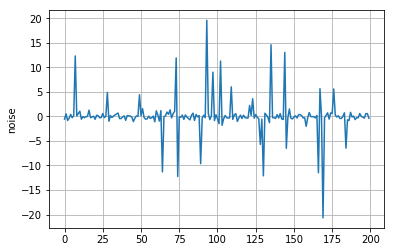

In [2]:
alpha = 0.1 # вероятность появления наблюдения из примеси 
sigma_1 = 0.5 # разброс основного распределения
sigma_2 = 10 # разброс распределения-примеси
N=200 # размер выборки
noise = gaussian.rvs(alpha, sigma_1, sigma_2, size=N)

plt.plot(noise)
plt.ylabel('noise')
plt.grid()

## 3. Подход Хьюбера

Рассмотрим задачу идентификации коэффициентов линейного регрессионного объекта: <br> 
    <br> $$ \large y(i) = b_0 + b_1 u_1(i)+...+b_n u_n(i) + \eta(i) $$ <br> в предположении, что
распределение $ \large f (\eta)$ помех принадлежит классу $ \large \alpha$-загрязненных
распределений:<br><br>
$$ \large Ф = \{ f (\eta) : f (\eta) = (1 - \alpha)h(\eta) + \alpha g(\eta)\} $$<br>
где $ \large h(\eta) $ — некоторая известная плотность распределения,<br>
$ \large g(\eta) $ — произвольная неизвестная плотность распределения и <br> $\large \alpha $ —
вероятность появления «выброса» с распределением $ \large g(\eta) $, $\large \alpha $ удовлетворяет условию
$\large 0  \leq  \alpha  \leq 1 $

### __Теорема Хьюбера (Хубера)__ .
Пусть $\large h(\eta)$ — дважды непрерывно дифференцируемая плотность распределения, такая, что $ \large (- ln (h(\eta)) $ — выпуклая вниз функция. <br>
Тогда АМКО линейных регрессионных объектов — $ \large V(F, f ) $ имеет седловую точку, т.е. существует плотность распределения $ \large f^* (\eta) = (1 - \alpha)h(\eta) + \alpha g^* (\eta) $ и функция $ \large F^* (\eta) = - ln f^* (\eta) $, такие, что:<br><br>
$$\large V(F^*, f ) \leq V(F^*, f^*) \leq V(F, f^*) $$

Далее, пусть  $\large \eta_0$ и $\large \eta_1$ ( $ \large \eta_0 < \eta_1 $) — концы интервала (один или
оба конца могут быть бесконечными), где $$ \large |\frac{h'(\eta)}{h(\eta)}| \leq k, \eta [\eta_0, \eta_1], $$

и $ \large k, \alpha, \eta_0,  \eta_1 $ связаны соотношением:
$$ \large (1-\alpha)^{-1} = \int_{\eta_0}^{\eta_1}h(\eta)d\eta + \frac{h(\eta_0)+h(\eta_1)}{k} $$

Тогда плотность $ \large f^*(\eta) $ имеет вид:
$$ \large f^*(\eta) = \left\{
    \begin{array}\\
        (1-\alpha)h(\eta_0)exp(k(\eta - \eta_0)), & \eta \leq \eta_0 \\
        (1-\alpha)h(\eta), & \eta_0 \leq \eta \leq \eta_1\\
        (1-\alpha)h(\eta_1)exp(-k(\eta - \eta_1)), &  \eta \geq \eta_1
    \end{array}  
\right. $$

Соответствующая оптимальная функция потерь:
    $$ \large F^*(\varepsilon) = \left\{
    \begin{array}\\
        -ln[(1-\alpha)h(\eta_0)] - k(\varepsilon - \eta_0), & \varepsilon \leq \eta_0 \\
        -ln[(1-\alpha)h(\varepsilon)], & \eta_0 \leq \varepsilon \leq \eta_1\\
        -ln[(1-\alpha)h(\eta_1)]+k(\varepsilon - \eta_1), &  \varepsilon \geq \eta_1
    \end{array}  
\right. $$

### Случай, когда $\large h(\eta) $ - нормальное распределение

$\large h(\eta) = f_N(\eta) = \frac{1}{\sigma_\eta\sqrt{2\pi}}exp(-\frac{\eta^2}{2\sigma_\eta})$

$$ \large F^*(\varepsilon) = \left\{
    \begin{array}\\
        -\frac{\Delta}{\sigma^2_\eta}\varepsilon - \frac{1}{2}\frac{\Delta^2}{\sigma^2_\eta}, & \varepsilon \leq -\Delta \\
        \frac{1}{2\sigma^2_\eta}\varepsilon^2, & | \varepsilon | < \Delta \\
        \frac{\Delta}{\sigma^2_\eta}\varepsilon - \frac{1}{2}\frac{\Delta^2}{\sigma^2_\eta}, &  \varepsilon \geq \Delta
    \end{array}  
\right. $$

где $ \large \Delta = \xi \sigma_\eta $

#### Связь вероятности выброса $\large \alpha$ и множителя $\large \xi$

$$\large \frac{1}{1-\alpha} = \int_{-\xi}^{\xi}\frac{1}{\sqrt{2\pi}}exp(-\frac{x^2}{2})dx + \frac{2}{\xi\sqrt{2\pi}}exp(-\frac{\xi^2}{2})$$

<img src="./img/alpha_xi.png" />

## 3. Чувствительность МНК к выбросам. Пример МНК и HuberRegressor

$ MSE : \sum (y_i - \hat{y}_i)^2 - квадратичная\_\_функция\_\_потерь$
<br>$ MAE : \sum |y_i - \hat{y}_i| - модульная\_\_функция\_\_потерь$ 
<br> $ Huber: \begin{equation} L_\delta(y_i, \hat{y}_i))= \left\{
    \begin{array}\\
        \frac{1}{2}(y_i - \hat{y}_i)^2, & |y_i - \hat{y}_i| < \delta \\
        \delta|y_i - \hat{y}_i| - \frac{1}{2}\delta^2, & иначе\\
    \end{array}  
\right.\end{equation}- функция\_\_потерь\_\_Хьюбера$

<img src="./img/losses.png" />

In [3]:
from sklearn.linear_model import LinearRegression, HuberRegressor
import random

In [4]:
n = 50
x = np.linspace(0, 10, n)

In [5]:
y = 4 + 0.5*x

In [6]:
noise = np.random.normal(0, 0.5, n)
y_new = y + noise

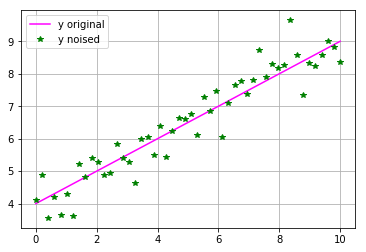

In [7]:
plt.plot(x, y, 'magenta', label='y original')
plt.plot(x, y_new, 'g*', label='y noised')
plt.grid()
plt.legend()

Добавим выбросов в данные

In [8]:
outliers = [25.6, 34.2, 44, 29, 50, 100, 90]
outliers_ind = random.sample(range(len(x)), len(outliers))

for i in range(len(outliers)): 
    y_new[outliers_ind[i]] = outliers[i]

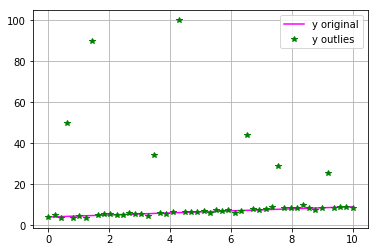

In [9]:
plt.plot(x, y, 'magenta', label='y original')
plt.plot(x, y_new, 'g*', label='y outlies')
plt.grid()
plt.legend()

Определим параметры $ y=kx+b $ с помощью МНК

In [10]:
reg_mse = LinearRegression()
reg_mse.fit(x[:, np.newaxis], y_new)
print('k=', round(reg_mse.coef_[0], 3), 'b=', round(reg_mse.intercept_, 3))

k= -0.478 b= 15.464


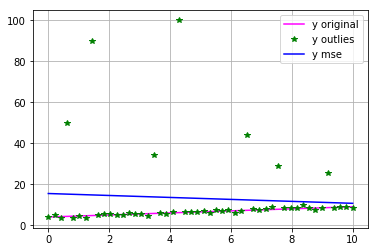

In [11]:
plt.plot(x, y, 'magenta', label='y original')
plt.plot(x, y_new, 'g*', label='y outlies')
plt.plot(x, reg_mse.coef_[0]*x + reg_mse.intercept_, 'b', label='y mse')
plt.grid()
plt.legend()

Попробуем определить параметры $ y = kx+b $ с помощью функции потерь Хьюбера

In [12]:
reg_huber = HuberRegressor()
reg_huber.fit(x[:, np.newaxis], y_new)
print('Huber: ', 'k=', round(reg_huber.coef_[0], 3), 'b=', round(reg_huber.intercept_, 3))
print('MSE:   ', 'k=', round(reg_mse.coef_[0], 3), 'b=', round(reg_mse.intercept_, 3))
print('Original:', 'k=', round(0.5, 3), 'b=', round(4, 3))

Huber:  k= 0.515 b= 4.068
MSE:    k= -0.478 b= 15.464
Original: k= 0.5 b= 4


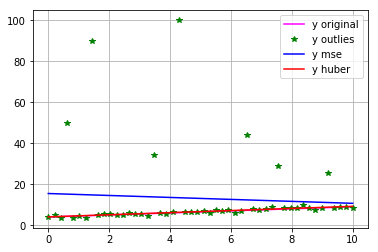

In [14]:
plt.plot(x, y, 'magenta', label='y original')
plt.plot(x, y_new, 'g*', label='y outlies')
plt.plot(x, reg_mse.coef_[0]*x + reg_mse.intercept_, 'b', label='y mse')
plt.plot(x, reg_huber.coef_[0]*x + reg_huber.intercept_, 'r', label='y huber')
plt.grid()
plt.legend()

### Реализация HuberRegressor в scikit-learn

https://github.com/scikit-learn/scikit-learn/blob/95d4f0841d57e8b5f6b2a570312e9d832e69debc/sklearn/linear_model/_huber.py#L17